In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import mpl_toolkits

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from scipy import stats
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

%matplotlib inline

In [13]:
train = pd.read_csv('./train.csv')
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [17]:
test = pd.read_csv("./test.csv")
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         HLS    AllPub      ...               144        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0      6    2010        WD         Normal  
1        Gar2   12500      6    2010        WD         Normal  
2         NaN       0      3    2010        WD         Normal  
3         NaN       0      6    2010        WD         Normal  
4         NaN       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [5]:
corr = train.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [19]:
total_missing_null = train.isnull().sum().sort_values(ascending=False)

percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
percent = round(percent, 2)

missing_data = pd.concat([total_missing_null, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(17)

Total  Percent
PoolQC         1453     1.00
MiscFeature    1406     0.96
Alley          1369     0.94
Fence          1179     0.81
FireplaceQu     690     0.47
LotFrontage     259     0.18
GarageCond       81     0.06
GarageType       81     0.06
GarageYrBlt      81     0.06
GarageFinish     81     0.06
GarageQual       81     0.06
BsmtExposure     38     0.03
BsmtFinType2     38     0.03
BsmtFinType1     37     0.03
BsmtCond         37     0.03
BsmtQual         37     0.03
MasVnrArea        8     0.01

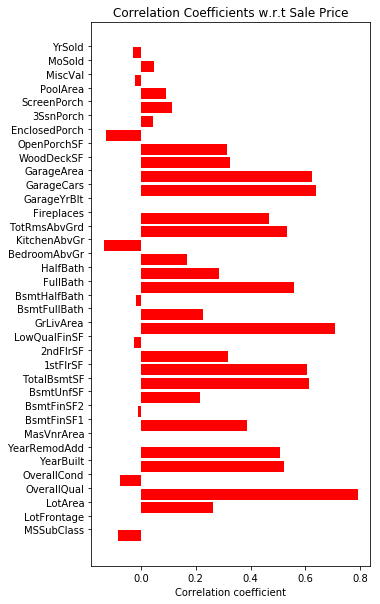

In [28]:
num_feat=train.columns[train.dtypes!=object]
num_feat=num_feat[1:-1] 

labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(train[col].values, train.SalePrice.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(5,10))

rects = ax.barh(ind, np.array(values), color='red')

ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

In [26]:
correlations=train.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
.unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

# sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

Attribute Pair  Correlation
0       (GarageArea, GarageCars)     0.882475
25      (GarageYrBlt, YearBuilt)     0.825667
16     (GrLivArea, TotRmsAbvGrd)     0.825489
17       (1stFlrSF, TotalBsmtSF)     0.819530
19         (2ndFlrSF, GrLivArea)     0.687501
14  (BedroomAbvGr, TotRmsAbvGrd)     0.676620
11    (BsmtFinSF1, BsmtFullBath)     0.649212
18   (GarageYrBlt, YearRemodAdd)     0.642277
24         (FullBath, GrLivArea)     0.630012
23      (2ndFlrSF, TotRmsAbvGrd)     0.616423
13          (2ndFlrSF, HalfBath)     0.609707
4      (GarageCars, OverallQual)     0.600671
15      (GrLivArea, OverallQual)     0.593007
5      (YearBuilt, YearRemodAdd)     0.592855
12     (GarageCars, GarageYrBlt)     0.588920
3       (OverallQual, YearBuilt)     0.572323
1          (1stFlrSF, GrLivArea)     0.566024
9      (GarageArea, GarageYrBlt)     0.564567
6      (GarageArea, OverallQual)     0.562022
20      (FullBath, TotRmsAbvGrd)     0.554784
10   (OverallQual, YearRemodAdd)     0.550684
7        (FullBath, OverallQual)     0.550600
8     (GarageYrBlt, OverallQual)     0.547766
21       (GarageCars, YearBuilt)     0.537850
2     (OverallQual, TotalBsmtSF)     0.537808
22     (BsmtFinSF1, TotalBsmtSF)     0.522396
26     (BedroomAbvGr, GrLivArea)     0.521270
27      (2ndFlrSF, BedroomAbvGr)     0.502901

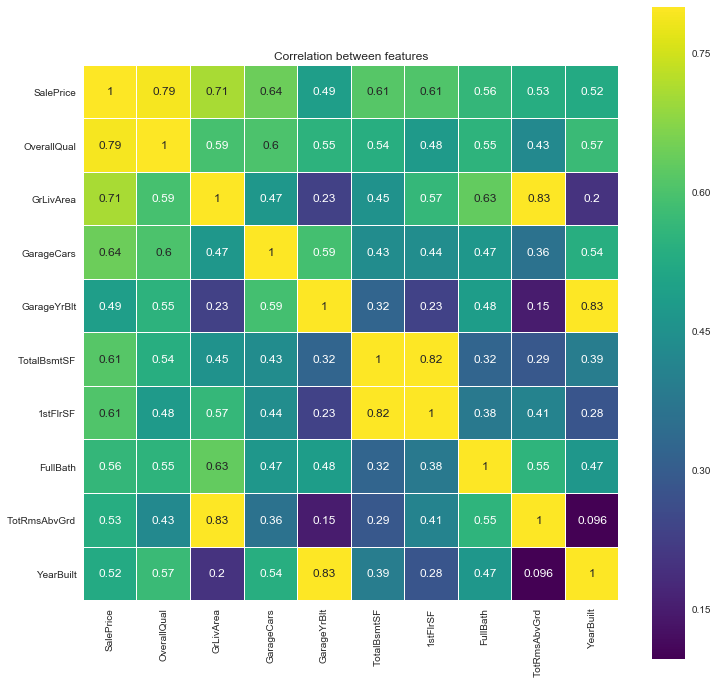

In [32]:
corrMatrix=train[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt"]].corr() #"YearRemoveAdd"

#remove "GarageArea"

sns.set(font_scale=1.0)
plt.figure(figsize=(12, 12))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='viridis',linecolor="white")

plt.title('Correlation between features');

In [33]:
from sklearn.preprocessing import LabelEncoder
train.fillna('NA', inplace =True)

def scaleColumns(df, cols_to_scale):
    yy=LabelEncoder()
    for col in cols_to_scale:
        df[col] = pd.DataFrame(yy.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

In [34]:
feature_list = ['SaleCondition', 'SaleType','Fence','PoolQC','GarageCond','GarageQual','GarageFinish', 'KitchenQual','GarageType','FireplaceQu','CentralAir','HeatingQC','BsmtFinType2','BsmtExposure','BsmtCond','BsmtQual','ExterCond','ExterQual','OverallCond', 'OverallQual','LandSlope','LotShape']

scaleColumns(train, feature_list)

C:\Users\faz00\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faz00\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faz00\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faz00\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley  LotShape  \
0        1          60       RL          65     8450   Pave    NA         3   
1        2          20       RL          80     9600   Pave    NA         3   
2        3          60       RL          68    11250   Pave    NA         0   
3        4          70       RL          60     9550   Pave    NA         0   
4        5          60       RL          84    14260   Pave    NA         0   
5        6          50       RL          85    14115   Pave    NA         0   
6        7          20       RL          75    10084   Pave    NA         3   
7        8          60       RL          NA    10382   Pave    NA         0   
8        9          50       RM          51     6120   Pave    NA         3   
9       10         190       RL          50     7420   Pave    NA         3   
10      11          20       RL          70    11200   Pave    NA         3   
11      12          60       RL          85    11924   Pave    NA         0   
12      13          20       RL          NA    12968   Pave    NA         1   
13      14          20       RL          91    10652   Pave    NA         0   
14      15          20       RL          NA    10920   Pave    NA         0   
15      16          45       RM          51     6120   Pave    NA         3   
16      17          20       RL          NA    11241   Pave    NA         0   
17      18          90       RL          72    10791   Pave    NA         3   
18      19          20       RL          66    13695   Pave    NA         3   
19      20          20       RL          70     7560   Pave    NA         3   
20      21          60       RL         101    14215   Pave    NA         0   
21      22          45       RM          57     7449   Pave  Grvl         3   
22      23          20       RL          75     9742   Pave    NA         3   
23      24         120       RM          44     4224   Pave    NA         3   
24      25          20       RL          NA     8246   Pave    NA         0   
25      26          20       RL         110    14230   Pave    NA         3   
26      27          20       RL          60     7200   Pave    NA         3   
27      28          20       RL          98    11478   Pave    NA         3   
28      29          20       RL          47    16321   Pave    NA         0   
29      30          30       RM          60     6324   Pave    NA         0   
...    ...         ...      ...         ...      ...    ...   ...       ...   
1430  1431          60       RL          60    21930   Pave    NA         2   
1431  1432         120       RL          NA     4928   Pave    NA         0   
1432  1433          30       RL          60    10800   Pave  Grvl         3   
1433  1434          60       RL          93    10261   Pave    NA         0   
1434  1435          20       RL          80    17400   Pave    NA         3   
1435  1436          20       RL          80     8400   Pave    NA         3   
1436  1437          20       RL          60     9000   Pave    NA         3   
1437  1438          20       RL          96    12444   Pave    NA         3   
1438  1439          20       RM          90     7407   Pave    NA         3   
1439  1440          60       RL          80    11584   Pave    NA         3   
1440  1441          70       RL          79    11526   Pave    NA         0   
1441  1442         120       RM          NA     4426   Pave    NA         3   
1442  1443          60       FV          85    11003   Pave    NA         3   
1443  1444          30       RL          NA     8854   Pave    NA         3   
1444  1445          20       RL          63     8500   Pave    NA         3   
1445  1446          85       RL          70     8400   Pave    NA         3   
1446  1447          20       RL          NA    26142   Pave    NA         0   
1447  1448          60       RL          80    10000   Pave    NA         3   
1448  1449          50       RL          70    11767   Pav

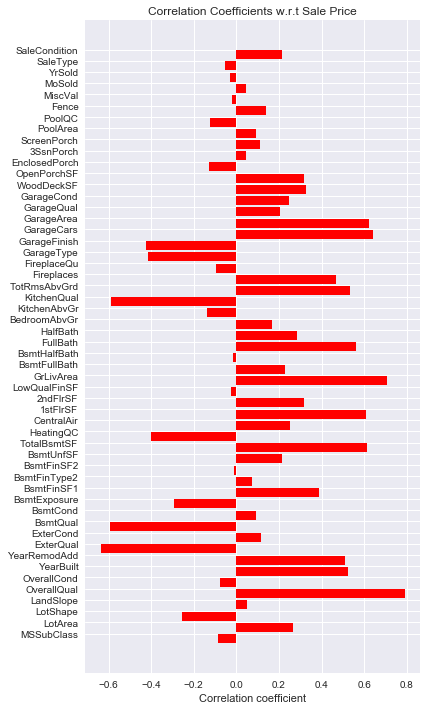

In [36]:
num_feat_2=train.columns[train.dtypes!=object]
num_feat_2=num_feat_2[1:-1] 

labels = []
values = []
for col in num_feat_2:
    labels.append(col)
    values.append(np.corrcoef(train[col].values, train.SalePrice.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(6,12))
rects = ax.barh(ind, np.array(values), color='red')

ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

In [37]:
correlations=train.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

C:\Users\faz00\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


Attribute Pair  Correlation
2             (PoolArea, PoolQC)    -0.884250
0       (GarageArea, GarageCars)     0.882475
22     (GrLivArea, TotRmsAbvGrd)     0.825489
23       (1stFlrSF, TotalBsmtSF)     0.819530
26    (BsmtFinSF2, BsmtFinType2)    -0.706303
24         (2ndFlrSF, GrLivArea)     0.687501
20  (BedroomAbvGr, TotRmsAbvGrd)     0.676620
13    (BsmtFinSF1, BsmtFullBath)     0.649212
3       (ExterQual, KitchenQual)     0.641584
17      (ExterQual, OverallQual)    -0.634319
32         (FullBath, GrLivArea)     0.630012
30      (GarageCond, GarageQual)     0.618383
31      (2ndFlrSF, TotRmsAbvGrd)     0.616423
14          (2ndFlrSF, HalfBath)     0.609707
10         (BsmtQual, YearBuilt)    -0.608569
7      (GarageCars, OverallQual)     0.600671
16       (BsmtQual, OverallQual)    -0.599639
19      (GrLivArea, OverallQual)     0.593007
8      (YearBuilt, YearRemodAdd)     0.592855
4          (BsmtQual, ExterQual)     0.572327
6       (OverallQual, YearBuilt)     0.572323
1          (1stFlrSF, GrLivArea)     0.566024
9      (GarageArea, OverallQual)     0.562022
29    (KitchenQual, OverallQual)    -0.555348
25      (FullBath, TotRmsAbvGrd)     0.554784
12   (OverallQual, YearRemodAdd)     0.550684
11       (FullBath, OverallQual)     0.550600
21       (GarageType, YearBuilt)    -0.540352
27       (GarageCars, YearBuilt)     0.537850
5     (OverallQual, TotalBsmtSF)     0.537808
28     (BsmtFinSF1, TotalBsmtSF)     0.522396
33     (BedroomAbvGr, GrLivArea)     0.521270
15      (BsmtQual, YearRemodAdd)    -0.509912
34      (2ndFlrSF, BedroomAbvGr)     0.502901
18        (BsmtQual, GarageCars)    -0.502547

In [15]:
corr=train.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
CentralAir       0.251328
GarageCond       0.246705
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
SaleCondition    0.213092
GarageQual       0.205963
BedroomAbvGr     0.168213
Fence            0.140640
ExterCond        0.117303
ScreenPorch      0.111447
PoolArea         0.092404
BsmtCond         0.091503
BsmtFinType2     0.072717
LandSlope        0.051152
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF

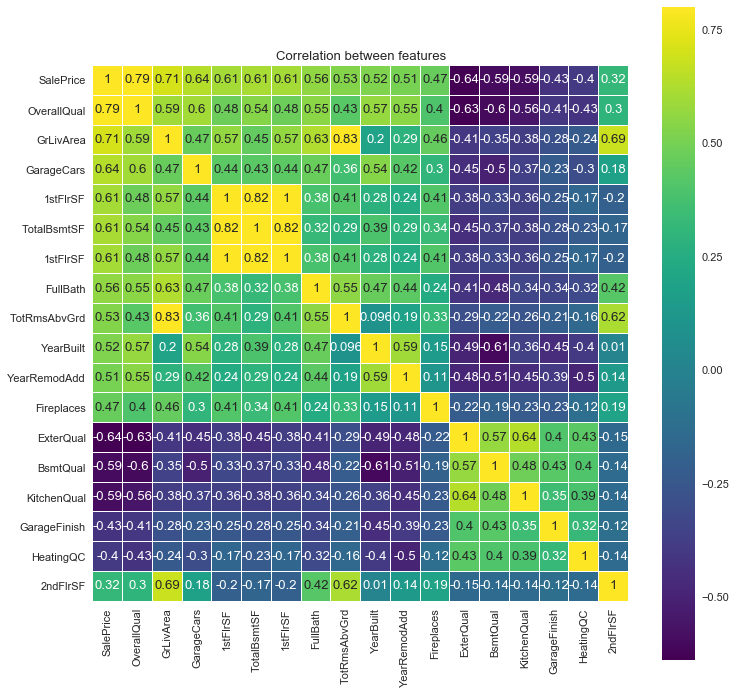

In [16]:
corrMatrix=train[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "1stFlrSF","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd","Fireplaces",
                 "ExterQual", "BsmtQual","KitchenQual","GarageFinish","HeatingQC","2ndFlrSF"]].corr() #"YearRemoveAdd"

#remove "GarageArea"

sns.set(font_scale=1.10)
plt.figure(figsize=(12, 12))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

In [38]:
#train['SalePrice'].corr(train['LotArea'])

x = train.drop(['Id','LotShape','ExterQual','GrLivArea', 'YrSold','BsmtFinSF2','KitchenAbvGr','BsmtFinType1','BsmtUnfSF', 'ExterCond',
                'BsmtHalfBath','MiscVal','LowQualFinSF','3SsnPorch' ,'MoSold', 'LandSlope', 'SaleType', 'BsmtFinType2','OverallCond','MSSubClass',
                'BsmtCond','EnclosedPorch','BsmtCond','PoolArea','PoolQC','Fence','ScreenPorch','FireplaceQu','GarageArea','GarageCars'], axis=1).corr(method='spearman').style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'),axis =1)
x

Skewness: 1.882876
Kurtosis: 6.536282
Standard Deviation 79415.291886


C:\Users\faz00\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


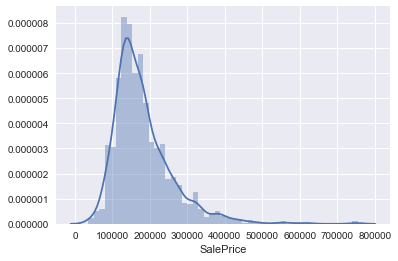

In [39]:
#train['GarageQual']
#train.replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,})

sns.distplot(train['SalePrice']);
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())
print("Standard Deviation %f" % np.std(train['SalePrice']))


Skewness: 0.216944
Kurtosis: 0.096293
Standard Deviation 1.382523


C:\Users\faz00\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


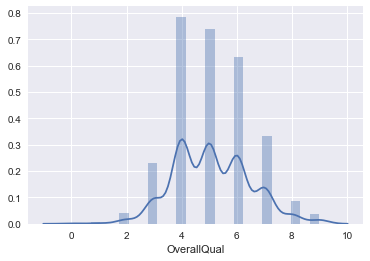

In [40]:
sns.distplot(train['OverallQual']);
print("Skewness: %f" % train['OverallQual'].skew())
print("Kurtosis: %f" % train['OverallQual'].kurt())
print("Standard Deviation %f" % np.std(train['OverallQual']))

Skewness: 1.366560
Kurtosis: 4.895121


C:\Users\faz00\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


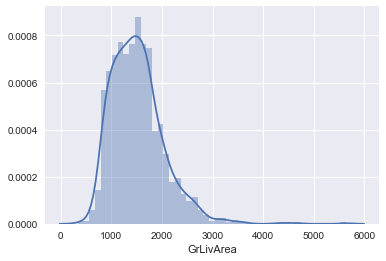

In [41]:
sns.distplot(train['GrLivArea']);
print("Skewness: %f" % train['GrLivArea'].skew())
print("Kurtosis: %f" % train['GrLivArea'].kurt())

Skewness: -0.613461
Kurtosis: -0.439552


C:\Users\faz00\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


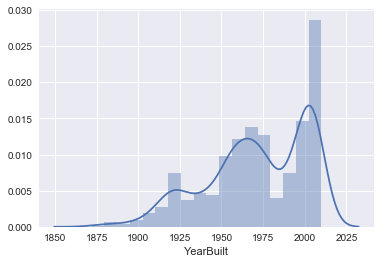

In [42]:
sns.distplot(train['YearBuilt']);
print("Skewness: %f" % train['YearBuilt'].skew())
print("Kurtosis: %f" % train['YearBuilt'].kurt())

Skewness: 0.179981
Kurtosis: 0.917067


C:\Users\faz00\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


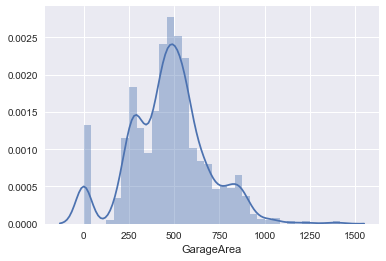

In [43]:
sns.distplot(train['GarageArea']);
print("Skewness: %f" % train['GarageArea'].skew())
print("Kurtosis: %f" % train['GarageArea'].kurt())

Skewness: -1.422808
Kurtosis: 1.732124


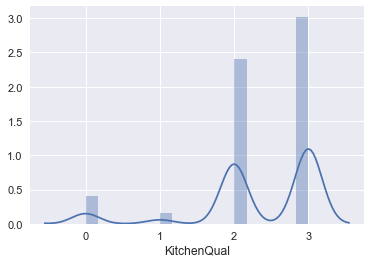

In [25]:
sns.distplot(train['KitchenQual']);
print("Skewness: %f" % train['KitchenQual'].skew())
print("Kurtosis: %f" % train['KitchenQual'].kurt())

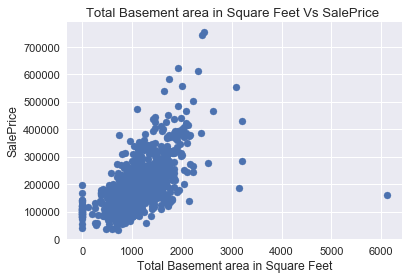

In [28]:
plt.scatter(train["TotalBsmtSF"],train["SalePrice"])
plt.title("Total Basement area in Square Feet Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement area in Square Feet");

C:\Users\faz00\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\faz00\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


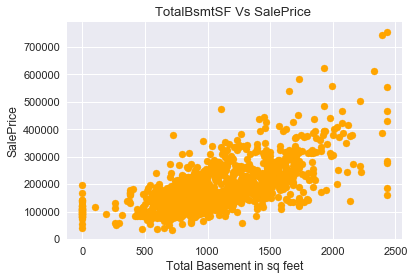

In [29]:
#there are few outliers in total basement area lets remove them
upperlimit = np.percentile(train.TotalBsmtSF.values, 99.5)
train['TotalBsmtSF'].ix[train['TotalBsmtSF']>upperlimit] = upperlimit

plt.scatter(train.TotalBsmtSF, train["SalePrice"].values,color='orange')
plt.title("TotalBsmtSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement in sq feet");

C:\Users\faz00\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\faz00\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


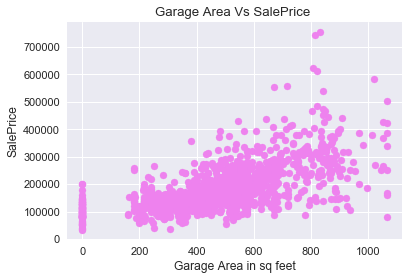

In [30]:
upperlimit = np.percentile(train.GarageArea.values, 99.5)
train['GarageArea'].ix[train['GarageArea']>upperlimit] = upperlimit

plt.scatter(train.GarageArea, train["SalePrice"].values,color='violet')
plt.title("Garage Area Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Garage Area in sq feet");

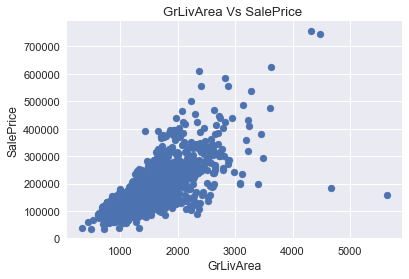

In [31]:
plt.scatter(train["GrLivArea"],train["SalePrice"])
plt.title("GrLivArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("GrLivArea");

C:\Users\faz00\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\faz00\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


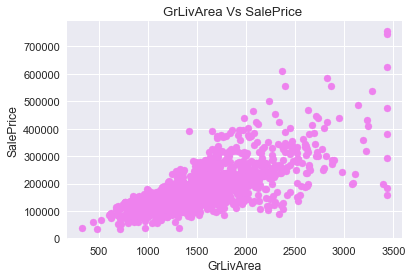

In [32]:
upperlimit = np.percentile(train.GrLivArea.values, 99.5)
train['GrLivArea'].ix[train['GrLivArea']>upperlimit] = upperlimit

plt.scatter(train.GrLivArea, train["SalePrice"].values,color='violet')
plt.title("GrLivArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("GrLivArea");


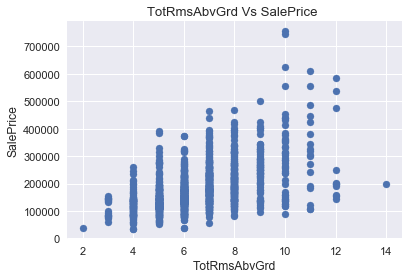

In [33]:
plt.scatter(train["TotRmsAbvGrd"],train["SalePrice"])
plt.title("TotRmsAbvGrd Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("TotRmsAbvGrd");

C:\Users\faz00\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\faz00\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


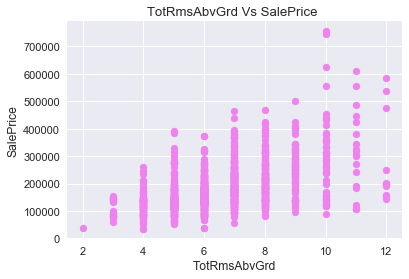

In [34]:
upperlimit = np.percentile(train.TotRmsAbvGrd.values, 99.5)
train['TotRmsAbvGrd'].ix[train['TotRmsAbvGrd']>upperlimit] = upperlimit

plt.scatter(train.TotRmsAbvGrd, train["SalePrice"].values,color='violet')
plt.title("TotRmsAbvGrd Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("TotRmsAbvGrd");


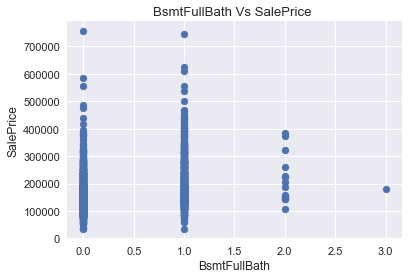

In [35]:
plt.scatter(train["BsmtFullBath"],train["SalePrice"])
plt.title("BsmtFullBath Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("BsmtFullBath");

C:\Users\faz00\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\faz00\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


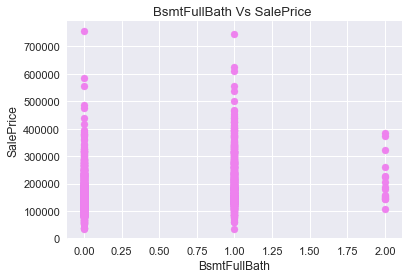

In [36]:
upperlimit = np.percentile(train.BsmtFullBath.values, 99.5)
train['BsmtFullBath'].ix[train['BsmtFullBath']>upperlimit] = upperlimit

plt.scatter(train.BsmtFullBath, train["SalePrice"].values,color='violet')
plt.title("BsmtFullBath Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("BsmtFullBath");


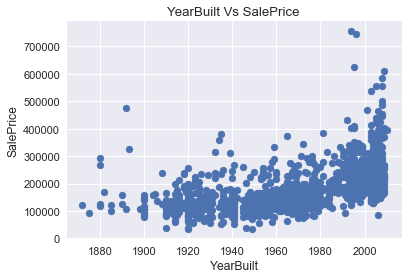

In [37]:
plt.scatter(train["YearBuilt"],train["SalePrice"])
plt.title("YearBuilt Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("YearBuilt");

C:\Users\faz00\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\faz00\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


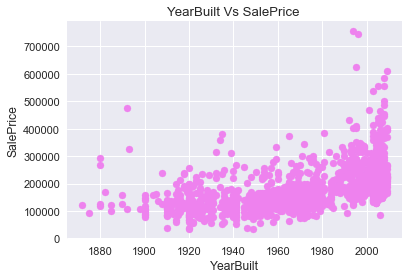

In [38]:
upperlimit = np.percentile(train.YearBuilt.values, 99.5)
train['YearBuilt'].ix[train['YearBuilt']>upperlimit] = upperlimit

plt.scatter(train.YearBuilt, train["SalePrice"].values,color='violet')
plt.title("YearBuilt Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("YearBuilt");



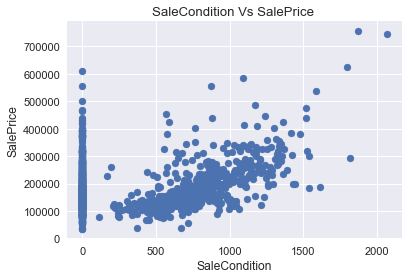

In [39]:
plt.scatter(train["2ndFlrSF"],train["SalePrice"])
plt.title("SaleCondition Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("SaleCondition");

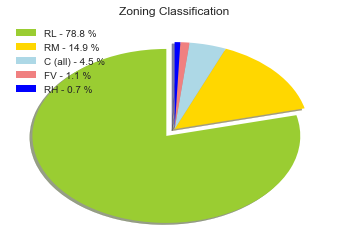

In [45]:
labels = train["MSZoning"].unique()
sizes = train["MSZoning"].value_counts().values
explode=[0.1,0,0,0,0]
parcent = 100.* sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue']
patches, texts= plt.pie(sizes, colors=colors,explode=explode, shadow=True,startangle=90)
plt.legend(patches, labels, loc="best")

plt.title("Zoning Classification")
plt.show()

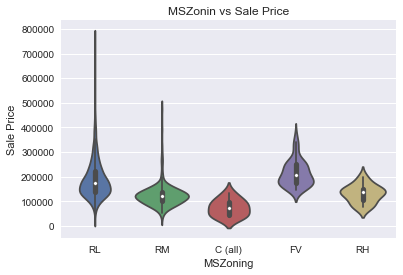

In [46]:
sns.violinplot(train.MSZoning,train["SalePrice"])
plt.title("MSZonin vs Sale Price")
plt.xlabel("MSZoning")
plt.ylabel("Sale Price");

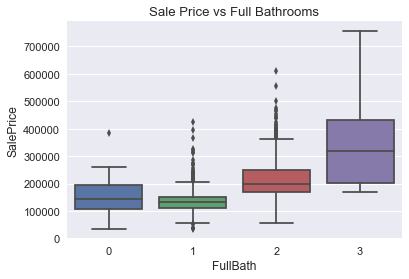

In [42]:
sns.boxplot(train["FullBath"],train["SalePrice"])
plt.title("Sale Price vs Full Bathrooms");

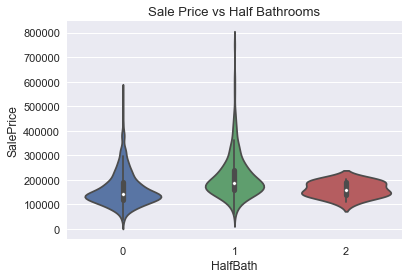

In [43]:
sns.violinplot( train["HalfBath"],train["SalePrice"])
plt.title("Sale Price vs Half Bathrooms");

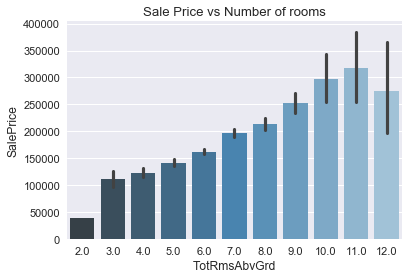

In [44]:
sns.barplot(train["TotRmsAbvGrd"],train["SalePrice"],palette="Blues_d")
plt.title("Sale Price vs Number of rooms");

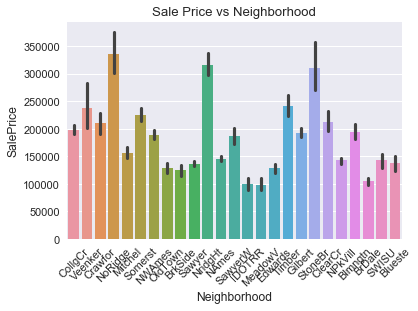

In [45]:
plt.xticks(rotation=45) 
sns.barplot(train["Neighborhood"],train["SalePrice"])
plt.title("Sale Price vs Neighborhood");

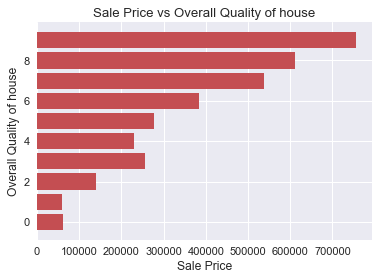

In [46]:
plt.barh(train["OverallQual"],width=train["SalePrice"],color="r")
plt.title("Sale Price vs Overall Quality of house")
plt.ylabel("Overall Quality of house")
plt.xlabel("Sale Price");

In [49]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))
train.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley  LotShape  \
0   1          60       RL          65     8450   Pave    NA         3   
1   2          20       RL          80     9600   Pave    NA         3   
2   3          60       RL          68    11250   Pave    NA         0   
3   4          70       RL          60     9550   Pave    NA         0   
4   5          60       RL          84    14260   Pave    NA         0   

  LandContour Utilities    ...     PoolArea  PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0       3     4          NA       0   
1         Lvl    AllPub    ...            0       3     4          NA       0   
2         Lvl    AllPub    ...            0       3     4          NA       0   
3         Lvl    AllPub    ...            0       3     4          NA       0   
4         Lvl    AllPub    ...            0       3     4          NA       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008         8              4  12.247699  
1      5   2007         8              4  12.109016  
2      9   2008         8              4  12.317171  
3      2   2006         8              0  11.849405  
4     12   2008         8              4  12.429220  

[5 rows x 81 columns]

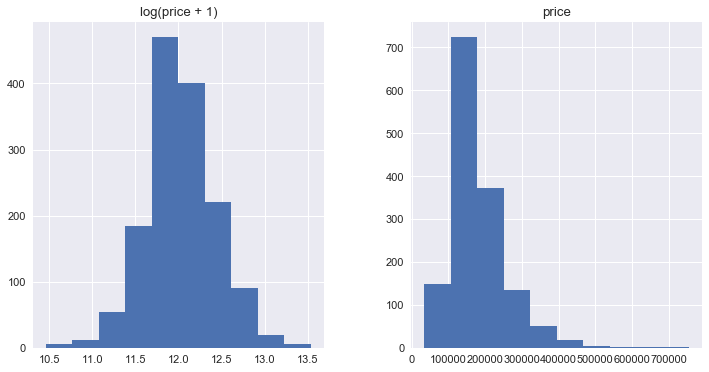

In [48]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist();

In [51]:
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())

In [52]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice
train.shape

(1460, 81)

In [53]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)


In [54]:
model_ridge = Ridge()

In [55]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

Text(0,0.5,'rmse')

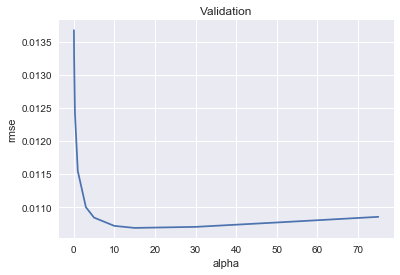

In [56]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [57]:
cv_ridge.min()

0.010686811184163139

In [62]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)


In [59]:
rmse_cv(model_lasso).mean()

0.011962604382679015

In [63]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [64]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 31 variables and eliminated the other 1037 variables


In [65]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5,1,'Coefficients in the Lasso Model')

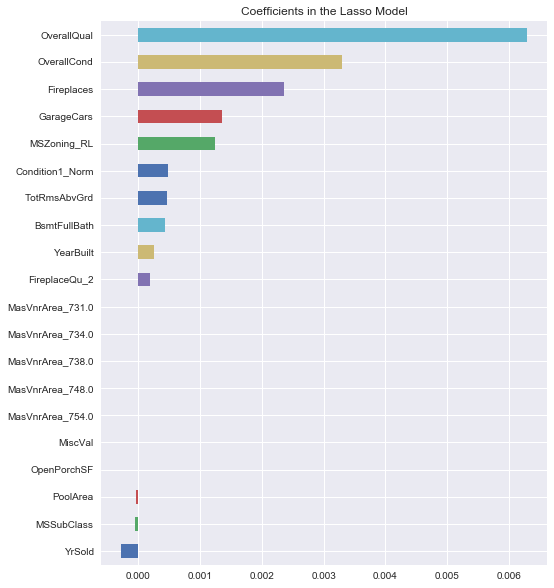

In [66]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

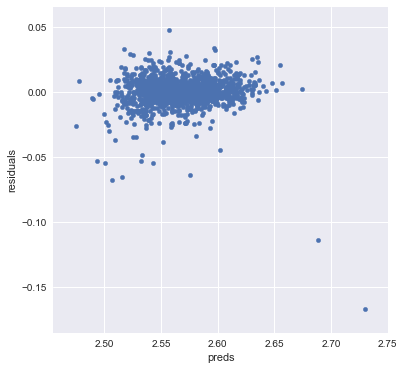

In [67]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [70]:
import xgboost as xgb

In [71]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

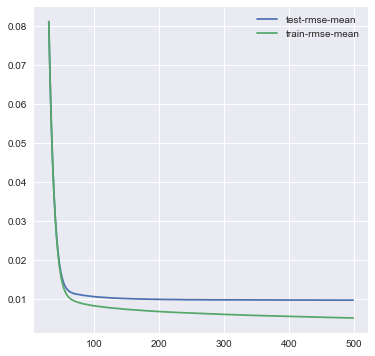

In [72]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [73]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

print(model)

     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0           1.860160        0.000205        1.860160       0.000474
1           1.674389        0.000187        1.674388       0.000496
2           1.507181        0.000172        1.507180       0.000517
3           1.356683        0.000158        1.356683       0.000536
4           1.221227        0.000146        1.221226       0.000554
5           1.099310        0.000135        1.099310       0.000571
6           0.989583        0.000126        0.989582       0.000587
7           0.890826        0.000119        0.890826       0.000603
8           0.801946        0.000113        0.801945       0.000618
9           0.721957        0.000108        0.721957       0.000633
10          0.649973        0.000104        0.649972       0.000648
11          0.585193        0.000101        0.585218       0.000638
12          0.526888        0.000096        0.526911       0.000609
13          0.474410        0.000091        0.47

In [74]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

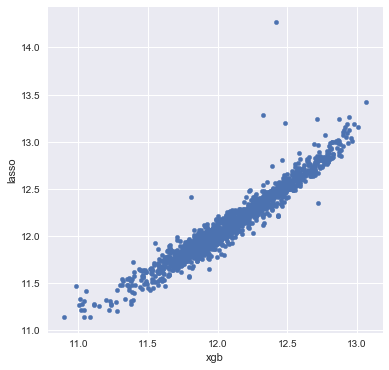

In [75]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [76]:
preds = 0.7*lasso_preds + 0.3*xgb_preds

In [83]:
solution = pd.DataFrame({"Id":train_test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)